In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

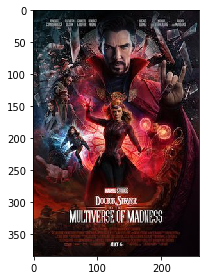

In [2]:
from skimage.io import imread,imshow
img1=imread('../input/dip-lab-5-data/Doctor_Strange_in_the_Multiverse_of_Madness_poster.jpg')
imshow(img1)

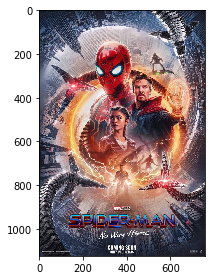

In [3]:
img2=imread('../input/dip-lab-5-data/spider-man-no-way-home-new-poster-759.jpg')
imshow(img2)

In [4]:
img1.shape

(384, 259, 3)

In [5]:
from skimage.transform import resize,rescale
img2=resize(img2,(384,259,3))

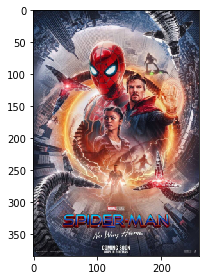

In [6]:
imshow(img2)

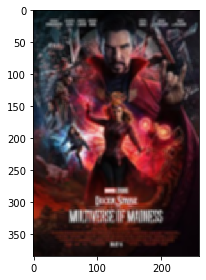

In [7]:
import cv2
blur_img=cv2.blur(img1,(5,5))
imshow(blur_img)

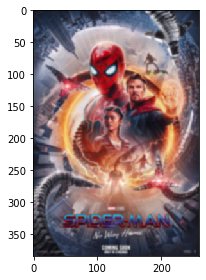

In [8]:
gaussian_img = cv2.GaussianBlur(img2,(5,5),0)
imshow(gaussian_img)

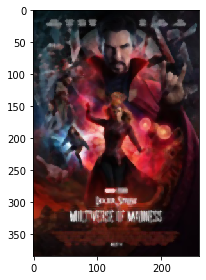

In [9]:
median_blur = cv2.medianBlur(img1,5)
imshow(median_blur)

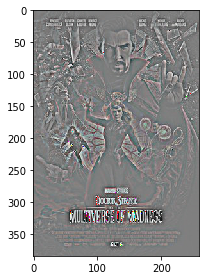

In [10]:
hpf = img1 - cv2.GaussianBlur(img1, (21, 21), 3)+127
imshow(hpf)

In [11]:
import logging
import numpy as np

# Homomorphic filter class
class HomomorphicFilter:
    

    def __init__(self, a = 0.5, b = 1.5):
        self.a = float(a)
        self.b = float(b)

    
    def __butterworth_filter(self, I_shape, filter_params):
        P = I_shape[0]/2
        Q = I_shape[1]/2
        U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]), sparse=False, indexing='ij')
        Duv = (((U-P)**2+(V-Q)**2)).astype(float)
        H = 1/(1+(Duv/filter_params[0]**2)**filter_params[1])
        return (1 - H)

    def __gaussian_filter(self, I_shape, filter_params):
        P = I_shape[0]/2
        Q = I_shape[1]/2
        H = np.zeros(I_shape)
        U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]), sparse=False, indexing='ij')
        Duv = (((U-P)**2+(V-Q)**2)).astype(float)
        H = np.exp((-Duv/(2*(filter_params[0])**2)))
        return (1 - H)


    def __apply_filter(self, I, H):
        H = np.fft.fftshift(H)
        I_filtered = (self.a + self.b*H)*I
        return I_filtered

    def filter(self, I, filter_params, filter='butterworth', H = None):
     

        
        if len(I.shape) is not 2:
            raise Exception('Improper image')

        
        I_log = np.log1p(np.array(I, dtype="float"))
        I_fft = np.fft.fft2(I_log)

        
        if filter=='butterworth':
            H = self.__butterworth_filter(I_shape = I_fft.shape, filter_params = filter_params)
        elif filter=='gaussian':
            H = self.__gaussian_filter(I_shape = I_fft.shape, filter_params = filter_params)
        elif filter=='external':
            print('external')
            if len(H.shape) is not 2:
                raise Exception('Invalid external filter')
        else:
            raise Exception('Selected filter not implemented')
        
        
        I_fft_filt = self.__apply_filter(I = I_fft, H = H)
        I_filt = np.fft.ifft2(I_fft_filt)
        I = np.exp(np.real(I_filt))-1
        return np.uint8(I)

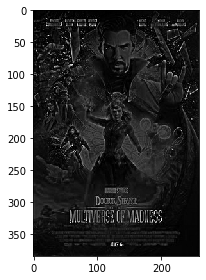

In [13]:
img=img1[:,:,0]
homo_filter = HomomorphicFilter(a = 0.75, b = 1.25)
img_filtered = homo_filter.filter(I=img, filter_params=[30,2])
imshow(img_filtered)